<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
import warnings 
    
warnings.simplefilter('ignore')

In [3]:
# Открываем файл и выводим первые 10 строк
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
display(data.head(10))
# Вызываем функцию info() для оценки заполненности таблицы, соответствия типов данных столбцов хранимым в них значениях
data.info()
# Проверим содержимое столбцов с категориальными значениями
columns = ['locality_name', 'total_images', 'last_price', 'total_area', 'rooms', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition', 'is_apartment']
for column in columns:
    display(data[column].value_counts())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
поселок Севастьяново                 1
деревня Хапо-Ое                      1
поселок Семиозерье                   1
поселок Коробицыно                   1
поселок Пансионат Зелёный Бор        1
Name: locality_name, Length: 364, dtype: int64

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
18.07       1
28.20       1
37.90       1
9.51        1
35.40       1
Name: kitchen_area, Length: 971, dtype: int64

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64

### Вывод
1. Столбец first_day_exposition имеет тип object, лучше поменять на формат даты 
2. Столбец floors_total имеет тип float64, лучше поменять на int (т.к. этажи не измеряются в вещественных числах)
3. Столбец is_apartment имеет тип object, лучше поменять на bool (т.к. там значения True/False)
4. Столбец balcony имеет тип float64, лучше поменять на int (т.к. балконы не измеряются в вещественных числах)
5. Столбец parks_around3000 имеет тип float64, лучше поменять на int (т.к. парки не измеряются в вещественных числах)
6. Столбец ponds_around3000 имеет тип float64, лучше поменять на int (т.к. водоемы не измеряются в вещественных числах)
7. Столбец days_exposition имеет тип float64, лучше поменять на int (т.к. дни не измеряются в вещественных числах)
8. Пропуски имеются в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

## Предобработка данных

In [4]:
# Посчитаем количество пропусков в колонках
display(len(data[data['ceiling_height'].isna()]))
display(len(data[data['floors_total'].isna()]))
display(len(data[data['living_area'].isna()]))
display(len(data[data['is_apartment'].isna()]))
display(len(data[data['kitchen_area'].isna()]))
display(len(data[data['balcony'].isna()]))
display(len(data[data['locality_name'].isna()]))
display(len(data[data['airports_nearest'].isna()]))
display(len(data[data['cityCenters_nearest'].isna()]))
display(len(data[data['parks_around3000'].isna()]))
display(len(data[data['parks_nearest'].isna()]))
display(len(data[data['ponds_around3000'].isna()]))
display(len(data[data['ponds_nearest'].isna()]))
display(len(data[data['days_exposition'].isna()]))

9195

86

1903

20924

2278

11519

49

5542

5519

5518

15620

5518

14589

3181

**Вывод**: Пропуски в колонке 'is_apartment', вероятно, они связаны с тем, что это не апартаменты, в колонке 'balcony' - в связи с их отсутствием. В остальных колоноках, вероятно, либо ошибка при выгрузке данных, либо отстутствие информации.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Заменим пропуски в столбце балконы на 0 и в столбце апартаменты на  False (вероятно, если ничего не указано, то их нет) 
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

In [7]:
#Заполним пропуски с площадями медианой с группировкой по числу комнат
for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms , 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms ), 'living_area'] = median
    median = data.loc[data['rooms'] == rooms , 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms ), 'kitchen_area'] = median

In [8]:
#Заполним расстояния до центра, аэропорта, водоемов и парков медианой с группировкой по населенному пункту
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median
    
    median = data.loc[data['locality_name'] == locality_name, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name'] == locality_name), 'parks_nearest'] = median
    
    median = data.loc[data['locality_name'] == locality_name, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name'] == locality_name), 'ponds_nearest'] = median
    
    median = data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == locality_name), 'airports_nearest'] = median

In [9]:
#Заполним высоту потолков медианой по всему набору данных (т.к. есть строительные стандарты для высоты потолков)
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18305 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           17667 non-null float64
ponds_around300

None

In [10]:
#Оставшиеся пропуски заполним по общей медиане 
#(кроме названий населенных пунктов и 'days_exposition', тк это может сильно искажать данные, которые нужны в дальнейшем для анализа)
names = ['floors_total', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest',
         'parks_around3000', 'ponds_nearest', 'ponds_around3000', 'parks_nearest'] 
for name in names:
    median = data[name].median()
    data[name] = data[name].fillna(median)

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

None

**Вывод**: Пропуски заполнены, кроме указанных выше столбцов. Скоро можно приступать к анализу.

In [11]:
# Заменим типы данных 

data['is_apartment'] = data['is_apartment'].astype('bool')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y.%m.%dT%H:%M:%S')


In [12]:
columns = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in columns:
    data[column] = data[column].astype('int')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

None

**Вывод**: Типы данных приведены к нужным значениям. Начинаем анализировать.

## Расчёты и добавление результатов в таблицу

In [13]:
#Посчитаем и добавим в таблицу цену квадратного метра
data['price_meter'] = data['last_price']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,460.0,0,584.5,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


In [14]:
#Посчитаем и добавим в таблицу день недели, месяц и год публикации объявления
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,year,month,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,460.0,0,584.5,81.0,82920.792079,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,2018,6,1


In [15]:
#Разобьем на категории и добавим в таблицу этаж квартиры (варианты — первый, последний, другой)
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1) 
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,year,month,weekday,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,2019,3,3,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,460.0,0,584.5,81.0,82920.792079,2018,12,1,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,2015,8,3,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2,84.0,3,234.0,424.0,408176.100629,2015,7,4,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,2018,6,1,другой


In [16]:
#Посчитаем и добавим в таблицу соотношение жилой и общей площади
data['living_total_area'] = data['living_area']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,year,month,weekday,floor_category,living_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,2019,3,3,другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,460.0,0,584.5,81.0,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,2015,8,3,другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3,234.0,424.0,408176.100629,2015,7,4,другой,0.283019
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,2018,6,1,другой,0.320000


In [17]:
#Посчитаем и добавим в таблицу отношение площади кухни к общей площади
data['kitchen_total_area'] = data['kitchen_area']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,year,month,weekday,floor_category,living_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,584.5,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424.0,408176.100629,2015,7,4,другой,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


**Вывод**: В таблицу для дальнейшего анализа добавлены следующие столбцы:
1. Цена за квадратный метр
2. Дата публикации разбита отдельно на день, месяц, год
3. Этажи разбиты на категории - первый, последний, другой
4. Добавлено соотношение жилой и общей площади
5. Добавлено соотношение площади кухни и общей площади

## Исследовательский анализ данных

In [18]:
def calculate_range(column):
    
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr, q3 + 1.5 * iqr)


In [19]:
def create_hist(column, title):
    data[column].hist(bins=100, range = calculate_range(column))
    display(data[column].mean())
    display(data[column].median())
    plt.title(title)
    plt.show()

60.34865099793241

52.0

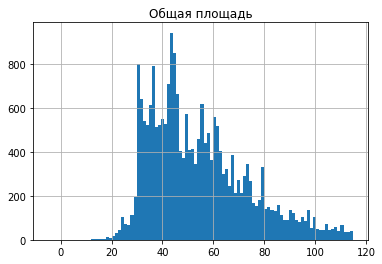

In [20]:
#Построим гистограмму для общей площади
create_hist('total_area', 'Общая площадь')


**Вывод**: Площади продаваемых квартир примерно около 52м2

34.32198158200768

30.3

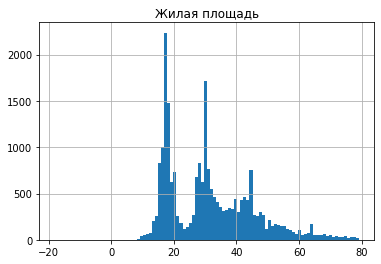

In [21]:
#Построим гистограмму для жилой площади
create_hist('living_area', 'Жилая площадь')


**Вывод**:Жилая площадь продаваемых квартир около 30м2

10.452659605890545

9.04

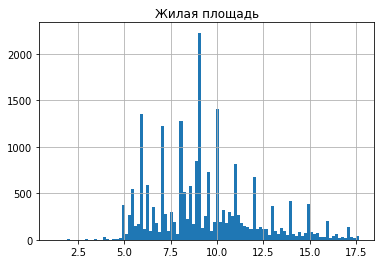

In [22]:
#Построим гистограмму для площади кухни
create_hist('kitchen_area', 'Жилая площадь')


**Вывод**: Площадь кухни продаваемых квартир около 9м2

6541548.771551542

4650000.0

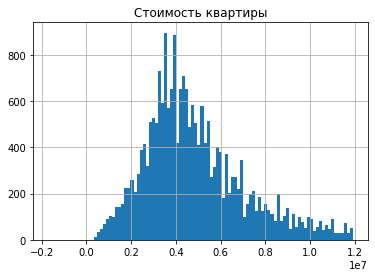

In [23]:
#Построим гистограмму для цены
create_hist('last_price', 'Стоимость квартиры')


**Вывод**:Цена продаваемых квартир около 4,5млн руб.

2.070635891809781

2.0

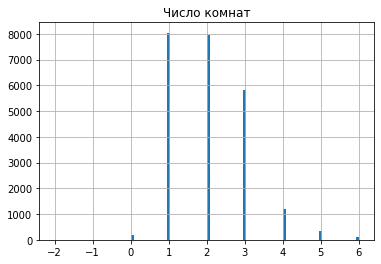

In [24]:
#Построим гистограмму для числа комнат
create_hist('rooms', 'Число комнат')


**Вывод**:Чаще продают двухкомнатные квартиры.

2.724358411747331

2.65

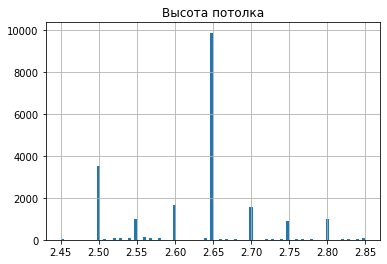

In [25]:
#Построим гистограмму для высоты потолка
create_hist('ceiling_height', 'Высота потолка')


**Вывод**:Высота потолков продаваемых квартир составляет около 2,65м.

In [26]:
#Помотрим описание распределений по всем столбцам
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,year,month,weekday,living_total_area,kitchen_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.667750,34.321982,5.892358,10.452660,0.591080,...,471.902971,0.823748,507.903751,180.888634,9.942166e+04,2017.367146,6.400101,2.569307,0.563845,0.189530
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.585961,21.700627,4.885249,5.642179,0.959298,...,203.540202,0.827588,175.543671,219.727988,5.030680e+04,1.039771,3.491561,1.789082,0.110933,0.075411
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,2014.000000,1.000000,0.000000,0.021583,0.018296
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.400000,0.000000,...,460.000000,0.000000,503.000000,45.000000,7.658547e+04,2017.000000,3.000000,1.000000,0.490326,0.133906
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,...,460.000000,1.000000,503.000000,95.000000,9.500000e+04,2017.000000,6.000000,3.000000,0.566596,0.173611
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,...,460.000000,1.000000,503.000000,232.000000,1.142563e+05,2018.000000,10.000000,4.000000,0.638298,0.234507
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000,12.000000,6.000000,1.514286,0.787879


180.88863436982163

95.0

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

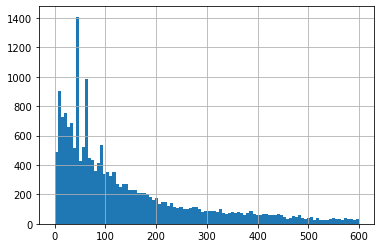

In [27]:
#Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. 
data['days_exposition'].hist(bins=100, range = (0,600))
display(data['days_exposition'].mean())
display(data['days_exposition'].median())
data['days_exposition'].describe()

**Выводы**:
1. Обычно продажа происходит в течение 95 дней
2. Продажи проходят очень быстро - в течение 45 дней, очень долго - больше 232 дней

In [28]:
def create_boxplot(column, y1, y2):
    data.boxplot(column, figsize=(8, 8));
    plt.ylim(y1, y2)
    data[column].describe()

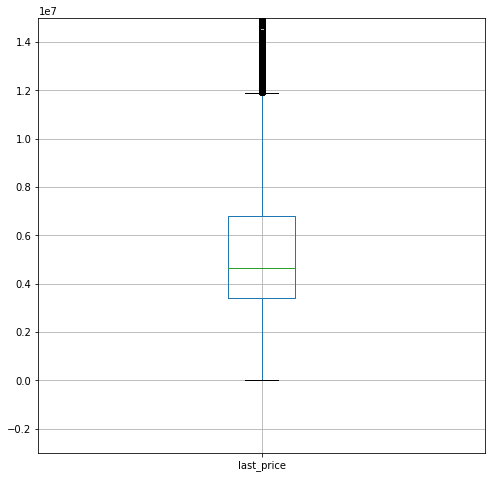

In [29]:
#Построим диаграмму размаха цены 
create_boxplot('last_price', -3e6, 1.5e7)


In [30]:
def filter_data(data, column):
    r = calculate_range(column)
    return data[(data[column] < r[1]) & (data[column] > r[0])]


In [31]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'last_price')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21638 entries, 1 to 23698
Data columns (total 29 columns):
total_images            21638 non-null int64
last_price              21638 non-null float64
total_area              21638 non-null float64
first_day_exposition    21638 non-null datetime64[ns]
rooms                   21638 non-null int64
ceiling_height          21638 non-null float64
floors_total            21638 non-null int64
living_area             21638 non-null float64
floor                   21638 non-null int64
is_apartment            21638 non-null bool
studio                  21638 non-null bool
open_plan               21638 non-null bool
kitchen_area            21638 non-null float64
balcony                 21638 non-null int64
locality_name           21595 non-null object
airports_nearest        21638 non-null float64
cityCenters_nearest     21638 non-null float64
parks_around3000        21638 non-null int64
parks_nearest           21638 non-null float64
ponds_around3

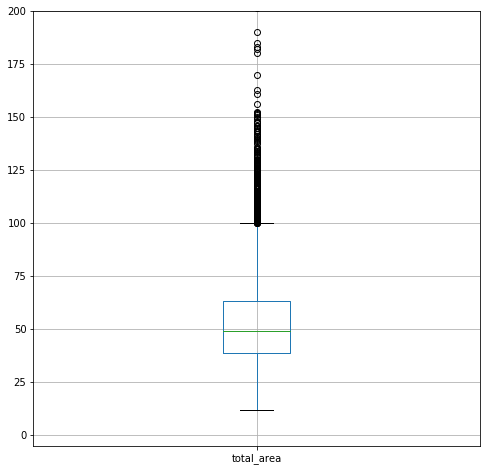

In [32]:
#Построим диаграмму размаха общей площади
create_boxplot('total_area', -5, 200)


In [33]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'total_area')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21186 entries, 1 to 23698
Data columns (total 29 columns):
total_images            21186 non-null int64
last_price              21186 non-null float64
total_area              21186 non-null float64
first_day_exposition    21186 non-null datetime64[ns]
rooms                   21186 non-null int64
ceiling_height          21186 non-null float64
floors_total            21186 non-null int64
living_area             21186 non-null float64
floor                   21186 non-null int64
is_apartment            21186 non-null bool
studio                  21186 non-null bool
open_plan               21186 non-null bool
kitchen_area            21186 non-null float64
balcony                 21186 non-null int64
locality_name           21145 non-null object
airports_nearest        21186 non-null float64
cityCenters_nearest     21186 non-null float64
parks_around3000        21186 non-null int64
parks_nearest           21186 non-null float64
ponds_around3

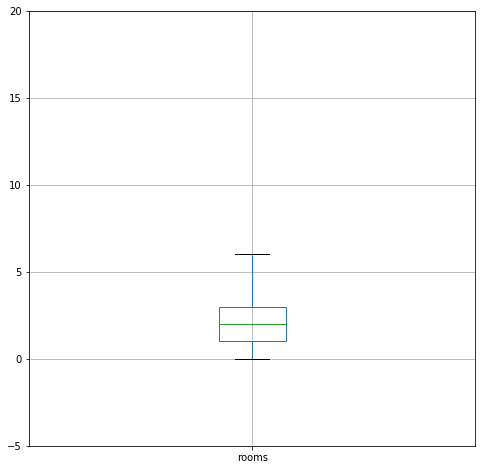

In [34]:
#Построим диаграмму размаха числа комнат 
create_boxplot('rooms', -5, 20)


In [35]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'rooms')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21184 entries, 1 to 23698
Data columns (total 29 columns):
total_images            21184 non-null int64
last_price              21184 non-null float64
total_area              21184 non-null float64
first_day_exposition    21184 non-null datetime64[ns]
rooms                   21184 non-null int64
ceiling_height          21184 non-null float64
floors_total            21184 non-null int64
living_area             21184 non-null float64
floor                   21184 non-null int64
is_apartment            21184 non-null bool
studio                  21184 non-null bool
open_plan               21184 non-null bool
kitchen_area            21184 non-null float64
balcony                 21184 non-null int64
locality_name           21143 non-null object
airports_nearest        21184 non-null float64
cityCenters_nearest     21184 non-null float64
parks_around3000        21184 non-null int64
parks_nearest           21184 non-null float64
ponds_around3

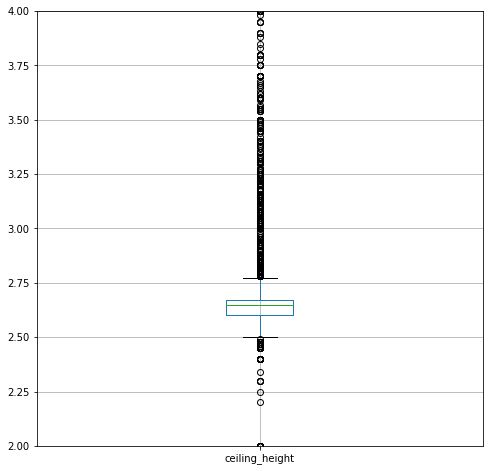

In [36]:
#Построим диаграмму размаха высоты потолка
create_boxplot('ceiling_height', 2, 4)


In [37]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'ceiling_height')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18333 entries, 1 to 23698
Data columns (total 29 columns):
total_images            18333 non-null int64
last_price              18333 non-null float64
total_area              18333 non-null float64
first_day_exposition    18333 non-null datetime64[ns]
rooms                   18333 non-null int64
ceiling_height          18333 non-null float64
floors_total            18333 non-null int64
living_area             18333 non-null float64
floor                   18333 non-null int64
is_apartment            18333 non-null bool
studio                  18333 non-null bool
open_plan               18333 non-null bool
kitchen_area            18333 non-null float64
balcony                 18333 non-null int64
locality_name           18297 non-null object
airports_nearest        18333 non-null float64
cityCenters_nearest     18333 non-null float64
parks_around3000        18333 non-null int64
parks_nearest           18333 non-null float64
ponds_around3

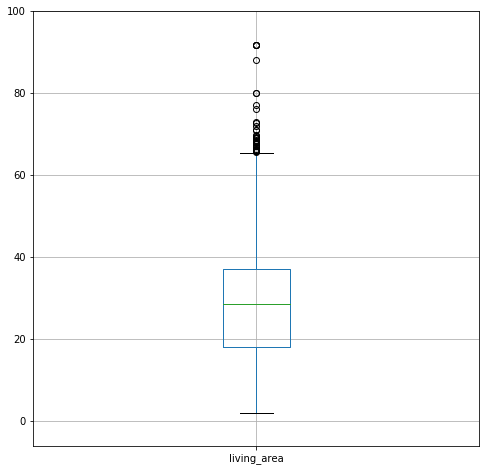

In [38]:
#Построим диаграмму размаха жилой площади
create_boxplot('living_area', -6, 100)


In [39]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'living_area')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18292 entries, 1 to 23698
Data columns (total 29 columns):
total_images            18292 non-null int64
last_price              18292 non-null float64
total_area              18292 non-null float64
first_day_exposition    18292 non-null datetime64[ns]
rooms                   18292 non-null int64
ceiling_height          18292 non-null float64
floors_total            18292 non-null int64
living_area             18292 non-null float64
floor                   18292 non-null int64
is_apartment            18292 non-null bool
studio                  18292 non-null bool
open_plan               18292 non-null bool
kitchen_area            18292 non-null float64
balcony                 18292 non-null int64
locality_name           18256 non-null object
airports_nearest        18292 non-null float64
cityCenters_nearest     18292 non-null float64
parks_around3000        18292 non-null int64
parks_nearest           18292 non-null float64
ponds_around3

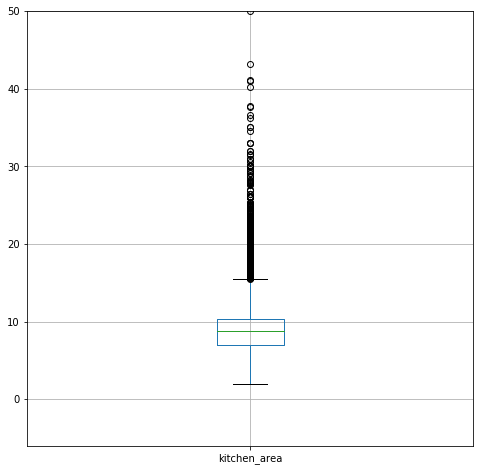

In [40]:
#Построим диаграмму размаха площади кухни
create_boxplot('kitchen_area', -6, 50)


In [41]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'kitchen_area')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17545 entries, 1 to 23698
Data columns (total 29 columns):
total_images            17545 non-null int64
last_price              17545 non-null float64
total_area              17545 non-null float64
first_day_exposition    17545 non-null datetime64[ns]
rooms                   17545 non-null int64
ceiling_height          17545 non-null float64
floors_total            17545 non-null int64
living_area             17545 non-null float64
floor                   17545 non-null int64
is_apartment            17545 non-null bool
studio                  17545 non-null bool
open_plan               17545 non-null bool
kitchen_area            17545 non-null float64
balcony                 17545 non-null int64
locality_name           17512 non-null object
airports_nearest        17545 non-null float64
cityCenters_nearest     17545 non-null float64
parks_around3000        17545 non-null int64
parks_nearest           17545 non-null float64
ponds_around3

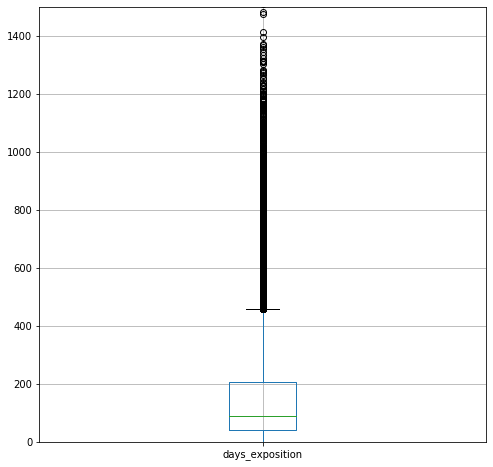

In [42]:
#Построим диаграмму размаха дней продажи
create_boxplot('days_exposition', 0, 1500)


In [43]:
#Уберем редкие и выбивающиеся значения
data = filter_data(data, 'days_exposition')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14232 entries, 1 to 23695
Data columns (total 29 columns):
total_images            14232 non-null int64
last_price              14232 non-null float64
total_area              14232 non-null float64
first_day_exposition    14232 non-null datetime64[ns]
rooms                   14232 non-null int64
ceiling_height          14232 non-null float64
floors_total            14232 non-null int64
living_area             14232 non-null float64
floor                   14232 non-null int64
is_apartment            14232 non-null bool
studio                  14232 non-null bool
open_plan               14232 non-null bool
kitchen_area            14232 non-null float64
balcony                 14232 non-null int64
locality_name           14206 non-null object
airports_nearest        14232 non-null float64
cityCenters_nearest     14232 non-null float64
parks_around3000        14232 non-null int64
parks_nearest           14232 non-null float64
ponds_around3

**Вывод**: Больше всего выбивающихся значений в категориях:
1. цена, общая площадь - возможно, проставлены лишние нули в конце
2. площадь кухни - возможно, погрешности измерения в квартирах-студиях
3. количество дней продажи - возможно, квартиры еще находятся в продаже, либо случайно не были сняты с продажи 

In [44]:
# Напишем функцию для разделения общей площади на категории
def area_categories(area):
    if area <= 30:
        return "маленькая"
    if area <= 80:
        return "средняя"
    return "большая"
data['area_categories'] = data['total_area'].apply(area_categories)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,year,month,weekday,floor_category,living_total_area,kitchen_total_area,area_categories
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,584.5,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277,средняя
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,503.0,55.0,95065.789474,2018,9,0,другой,0.473684,0.299342,средняя
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,593.0,155.0,99195.710456,2017,11,3,другой,0.284182,0.386059,средняя
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,503.0,189.0,87454.764777,2018,5,2,другой,0.465320,0.265682,средняя
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,503.0,289.0,88524.590164,2017,2,6,другой,0.714754,0.106557,средняя


Text(0.5, 0.98, '')

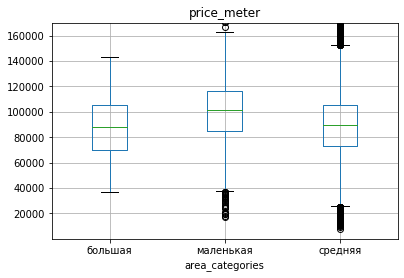

In [45]:
#Выясним, зависит ли цена от площади
data.boxplot(column = 'price_meter', by = 'area_categories');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**: Квадратный метр дороже у квартир с небольшой площадью

Text(0.5, 0.98, '')

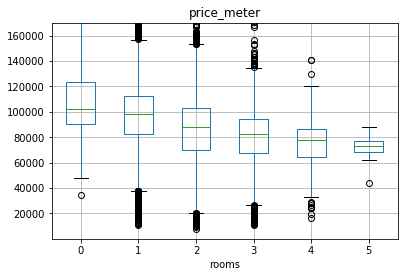

In [46]:
#Выясним, зависит ли цена от числа комнат
data.boxplot(column = 'price_meter', by = 'rooms');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**: Чем больше комнат, тем дешевле квадратный метр

In [47]:
# Напишем функцию для разделения на категории степень удаленности от центра
def cityCenters_nearest_categories(cityCenters_nearest):
    if cityCenters_nearest <= 4000:
        return "близко к центру"
    if cityCenters_nearest <= 7000:
        return "среднее расстояние до центра"
    return "далеко от центра"
data['cityCenters_nearest_categories'] = data['cityCenters_nearest'].apply(cityCenters_nearest_categories)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_meter,year,month,weekday,floor_category,living_total_area,kitchen_total_area,area_categories,cityCenters_nearest_categories
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277,средняя,далеко от центра
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,55.0,95065.789474,2018,9,0,другой,0.473684,0.299342,средняя,далеко от центра
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,155.0,99195.710456,2017,11,3,другой,0.284182,0.386059,средняя,далеко от центра
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,189.0,87454.764777,2018,5,2,другой,0.465320,0.265682,средняя,далеко от центра
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.0,88524.590164,2017,2,6,другой,0.714754,0.106557,средняя,далеко от центра


Text(0.5, 0.98, '')

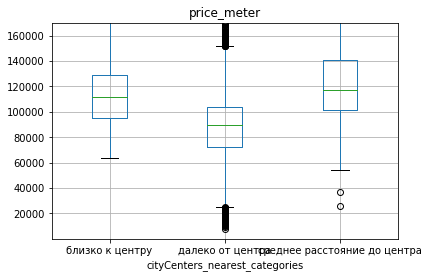

In [48]:
#Выясним, зависит ли цена от удалённости от центра
data.boxplot(column = 'price_meter', by = 'cityCenters_nearest_categories');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**: чем дальше от центра, тем дешевле квадратный метр

Text(0.5, 0.98, '')

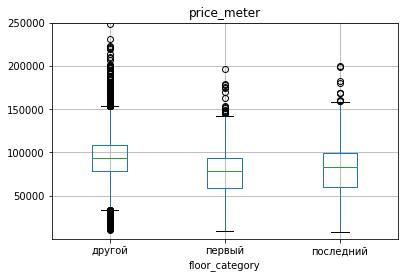

In [49]:
#Выясним, зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом
data.boxplot(column = 'price_meter', by = 'floor_category');
plt.ylim(1, 250000)
plt.suptitle('')

**Вывод**: на первом и последнем этажах стоимость квадратного метра дешевле

Text(0.5, 0.98, '')

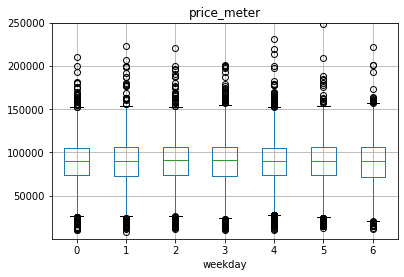

In [50]:
#зависимость от даты размещения: дня недели, месяца и года
data.boxplot(column = 'price_meter', by = 'weekday');
plt.ylim(1, 250000)   
plt.suptitle('')

**Вывод**: особой зависимости цены от дня недели не выявлено

Text(0.5, 0.98, '')

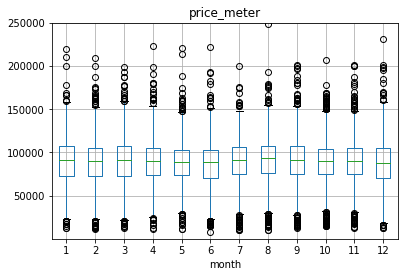

In [51]:
#зависимость от даты размещения: дня недели, месяца и года
data.boxplot(column = 'price_meter', by = 'month');
plt.ylim(1, 250000)   
plt.suptitle('')

**Вывод**: особой зависимости цены от месяца не выявлено

Text(0.5, 0.98, '')

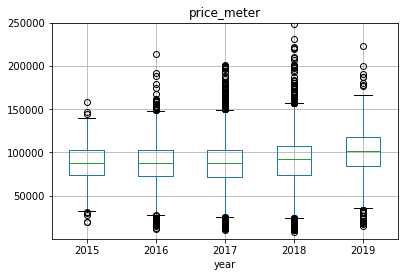

In [52]:
#зависимость от даты размещения: дня недели, месяца и года
data.boxplot(column = 'price_meter', by = 'year');
plt.ylim(1, 250000) 
plt.suptitle('')

**Вывод**: В 2019 году цены на квартиры выросли!

In [53]:
#В связи с тем, что некоторые населенные пункты могут содержать село, поселок(посёлок) и тд, оставим только сами названия населенных пунктов
data['locality_name_new'] = data['locality_name']
for repl in ['поселок', 'деревня', 'посёлок', 'городской', 'коттеджный']:
    data['locality_name_new'] = data['locality_name_new'].str.replace(repl, '')

data[['locality_name', 'locality_name_new']].drop_duplicates()

,locality_name,locality_name_new
1,посёлок Шушары,Шушары
5,городской посёлок Янино-1,Янино-1
6,посёлок Парголово,Парголово
8,посёлок Мурино,Мурино
9,Санкт-Петербург,Санкт-Петербург
...,...,...
23048,коттеджный посёлок Лесное,Лесное
23297,Высоцк,Высоцк
23354,деревня Тихковицы,Тихковицы
23391,поселок Любань,Любань


In [54]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

top_city = data.groupby('locality_name_new').agg({'rooms':'count', 'price_meter':'mean'}).sort_values(by='rooms', ascending = False).head(10)
top_city = top_city.reset_index()
display(top_city)
top_city.info()

,locality_name_new,rooms,price_meter
0,Санкт-Петербург,8729,102580.225104
1,Мурино,474,85836.358019
2,Шушары,346,77730.177504
3,Всеволожск,263,66269.401265
4,Колпино,258,74537.270793
5,Парголово,253,89792.480115
6,Кудрово,221,93328.379809
7,Гатчина,214,67806.569853
8,Пушкин,209,97952.837800
9,Выборг,164,56640.167012


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
locality_name_new    10 non-null object
rooms                10 non-null int64
price_meter          10 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

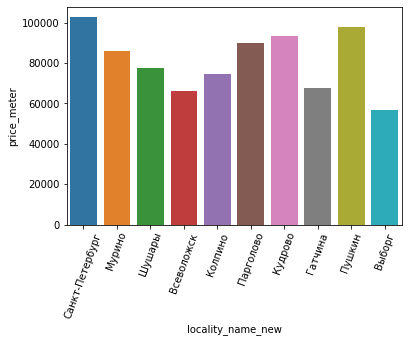

In [55]:
seaborn.barplot(x = top_city['locality_name_new'], y = top_city['price_meter'])
plt.xticks(rotation='70')

In [56]:
#Выделим населённые пункты с самой высокой стоимостью жилья. 
display(data.groupby('locality_name_new').agg({'rooms':'count', 
                                              'price_meter':'mean'}).sort_values(by='rooms', ascending = False).head(1))



,rooms,price_meter
locality_name_new,,
Санкт-Петербург,8729,102580.225104


**Вывод**: В Санкт-Петербурге самая высокая цена на квартиры.

In [57]:
#Выделим населённые пункты с самой низкой стоимостью жилья. 
display(data.groupby('locality_name_new').agg({'rooms':'count', 
                                              'price_meter':'mean'}).sort_values(by='rooms', ascending = False).head(10).tail(1))

,rooms,price_meter
locality_name_new,,
Выборг,164,56640.167012


**Вывод**: Из 9 ближайших населенных пунктов с наибольшим числом объявлений самая низкая цена на квартиры в Выборге.

In [58]:
#Выделим квартиры в Санкт-Петербурге  
data_spb = data.query('locality_name_new == "Санкт-Петербург"')
display(data_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_meter,year,month,weekday,floor_category,living_total_area,kitchen_total_area,area_categories,cityCenters_nearest_categories,locality_name_new
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,88524.590164,2017,2,6,другой,0.714754,0.106557,средняя,далеко от центра,Санкт-Петербург
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,127525.252525,2017,11,3,другой,0.512626,0.214646,средняя,далеко от центра,Санкт-Петербург
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,119230.769231,2017,11,5,другой,0.525641,0.194872,средняя,далеко от центра,Санкт-Петербург
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,104838.709677,2017,1,4,другой,0.625806,0.180645,средняя,далеко от центра,Санкт-Петербург
21,13,3200000.0,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,101265.822785,2018,3,2,другой,0.534810,0.180380,средняя,далеко от центра,Санкт-Петербург


In [59]:
#Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. 
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest']/1000).astype('int')
display(data_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,month,weekday,floor_category,living_total_area,kitchen_total_area,area_categories,cityCenters_nearest_categories,locality_name_new,cityCenters_km
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,2017,2,6,другой,0.714754,0.106557,средняя,далеко от центра,Санкт-Петербург,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2017,11,3,другой,0.512626,0.214646,средняя,далеко от центра,Санкт-Петербург,13
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,2017,11,5,другой,0.525641,0.194872,средняя,далеко от центра,Санкт-Петербург,14
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,2017,1,4,другой,0.625806,0.180645,средняя,далеко от центра,Санкт-Петербург,10
21,13,3200000.0,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,2018,3,2,другой,0.534810,0.180380,средняя,далеко от центра,Санкт-Петербург,9


In [60]:
#Посчитаем среднюю цену для каждого километра
price_mean_km = data_spb.pivot_table(index='cityCenters_km', values='price_meter', aggfunc='mean')
display(price_mean_km)

,price_meter
cityCenters_km,
0,125195.648442
1,125679.421146
2,117776.739440
3,111695.425340
4,126650.744269
5,119046.493581
6,121773.823291
7,115690.162183
8,107273.946248


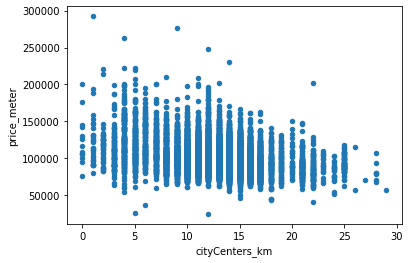

In [61]:
#Построим график: он должен показывать, как цена зависит от удалённости от центра
data_spb.plot(x='cityCenters_km', y='price_meter', kind='scatter');

**Вывод**:
1. По графику видно, что чем дальше от центра, тем стоимость квадратного метра меньше
2. После отметки 15км график изменяется, следовательно, в радиусе 15 км и будет центральная зона

In [62]:
#Выделим сегмент квартир в центре. 
spb_centr = data_spb.query('cityCenters_km <= 15')
display(spb_centr)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,month,weekday,floor_category,living_total_area,kitchen_total_area,area_categories,cityCenters_nearest_categories,locality_name_new,cityCenters_km
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,2017,2,6,другой,0.714754,0.106557,средняя,далеко от центра,Санкт-Петербург,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2017,11,3,другой,0.512626,0.214646,средняя,далеко от центра,Санкт-Петербург,13
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,2017,11,5,другой,0.525641,0.194872,средняя,далеко от центра,Санкт-Петербург,14
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,2017,1,4,другой,0.625806,0.180645,средняя,далеко от центра,Санкт-Петербург,10
21,13,3200000.0,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,2018,3,2,другой,0.534810,0.180380,средняя,далеко от центра,Санкт-Петербург,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23671,3,3450000.0,35.3,2017-04-14,1,2.50,9,17.5,4,False,...,2017,4,4,другой,0.495751,0.212465,средняя,далеко от центра,Санкт-Петербург,15
23676,19,3550000.0,36.4,2016-06-08,1,2.65,16,14.9,13,False,...,2016,6,2,другой,0.409341,0.255495,средняя,далеко от центра,Санкт-Петербург,11
23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,2018,5,4,другой,0.674419,0.139535,средняя,далеко от центра,Санкт-Петербург,7
23686,8,3300000.0,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,2017,4,5,другой,0.580645,0.209677,средняя,далеко от центра,Санкт-Петербург,11


50.06557446808511

46.0

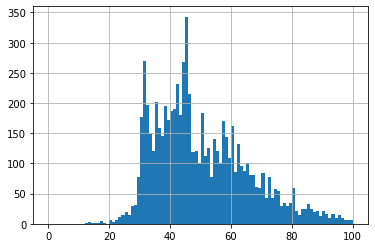

In [63]:
#Построим гистограмму для общей площади квартир в центре Санкт-Петербурга
spb_centr['total_area'].hist(bins=100, range = (0,100))
display(spb_centr['total_area'].mean())
display(spb_centr['total_area'].median())

28.94440730609929

28.575000000000003

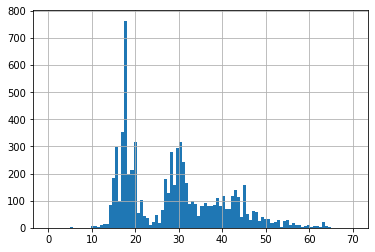

In [64]:
#Построим гистограмму для жилой площади квартир в центре Санкт-Петербурга
spb_centr['living_area'].hist(bins=100, range = (0,70))
display(spb_centr['living_area'].mean())
display(spb_centr['living_area'].median())

8.770378723404255

8.7

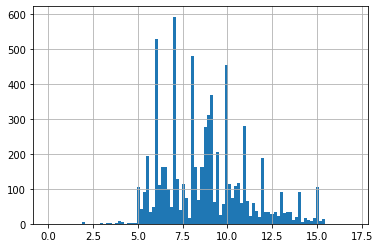

In [65]:
#Построим гистограмму для площади кухни квартир в центре Санкт-Петербурга
spb_centr['kitchen_area'].hist(bins=100, range = (0,17))
display(spb_centr['kitchen_area'].mean())
display(spb_centr['kitchen_area'].median())

5172175.540992908

4700000.0

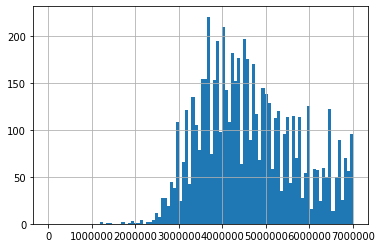

In [66]:
#Построим гистограмму для цены квартир в центре Санкт-Петербурга
spb_centr['last_price'].hist(bins=100, range = (0,7000000))
display(spb_centr['last_price'].mean())
display(spb_centr['last_price'].median())

1.865531914893617

2.0

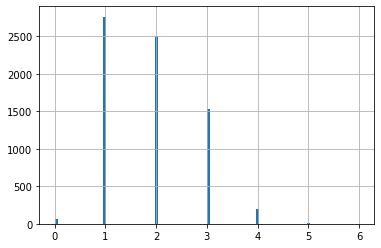

In [67]:
#Построим гистограмму для числа комнат в квартирах в центре Санкт-Петербурга
spb_centr['rooms'].hist(bins=100, range = (0,6))
display(spb_centr['rooms'].mean())
display(spb_centr['rooms'].median())

2.6185900709219854

2.65

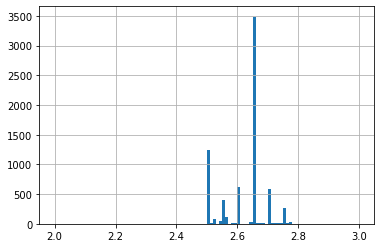

In [68]:
#Построим гистограмму для высоты потолка в квартирах в центре Санкт-Петербурга
spb_centr['ceiling_height'].hist(bins=100, range = (2,3))
display(spb_centr['ceiling_height'].mean())
display(spb_centr['ceiling_height'].median())

**Вывод**: 
1. Общая площадь продаваемых в центре Санкт-Петербурга квартир, в среднем, около 46м2
2. Жилая площадь продаваемых в центре Санкт-Петербурга квартир, в среднем, около 28,5м2
3. Площадь кухни продаваемых в центре Санкт-Петербурга квартир, в среднем, около 8,7м2
4. Цена продаваемых в центре Санкт-Петербурга квартир, в среднем, около 4,7млн руб
5. Число комнат продаваемых в центре Санкт-Петербурга квартир, в среднем, 2
6. Высота потолка продаваемых в центре Санкт-Петербурга квартир, в среднем, около 2,65м

Text(0.5, 0.98, '')

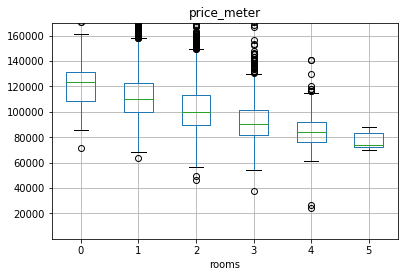

In [69]:
#Выясним, зависит ли цена от числа комнат
spb_centr.boxplot(column = 'price_meter', by = 'rooms');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**: Чем больше комнат, тем стоимость квадратного метра ниже

Text(0.5, 0.98, '')

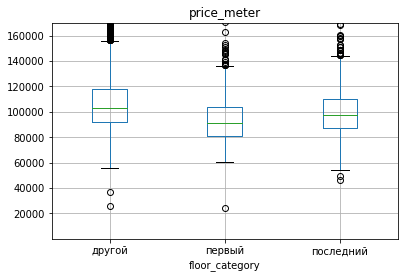

In [70]:
#Выясним, зависит ли цена от этажа
spb_centr.boxplot(column = 'price_meter', by = 'floor_category');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**: На первом и последнем этажах стоимость квадратного метра ниже.

Text(0.5, 0.98, '')

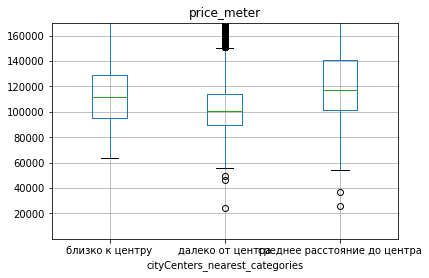

In [71]:
#Выясним, зависит ли цена от удалённости от центра
spb_centr.boxplot(column = 'price_meter', by = 'cityCenters_nearest_categories');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**:Квартиры дороже на средней удаленности от центра и близко к центру.

Text(0.5, 0.98, '')

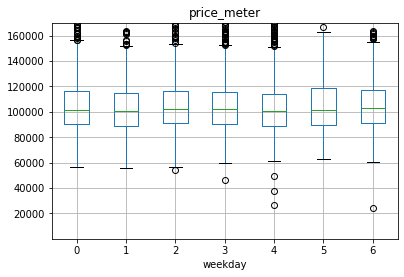

In [72]:
#Выясним, зависит ли цена от дня размещения объявления
spb_centr.boxplot(column = 'price_meter', by = 'weekday');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**: Цена квадратного метра не зависит от дня недели размещения объявления.

Text(0.5, 0.98, '')

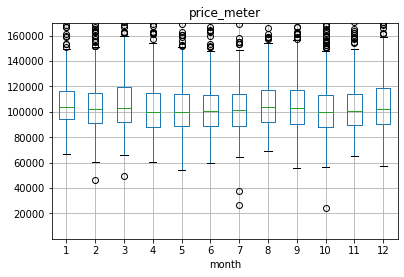

In [73]:
#Выясним, зависит ли цена от месяца размещения объявления
spb_centr.boxplot(column = 'price_meter', by = 'month');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**:Стоимость квадратного метра немного выше зимой, в марте, августе, сентябре.

Text(0.5, 0.98, '')

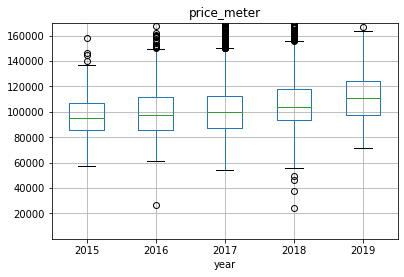

In [74]:
#Выясним, зависит ли цена от года размещения объявления
spb_centr.boxplot(column = 'price_meter', by = 'year');
plt.ylim(1, 170000)
plt.suptitle('')

**Вывод**:Стоимость квартир в центральной части Санкт-Петербурга растет с каждым годом, в 2019г произошел более явный скачок.

**Вывод**: По сравнению с общими выводами по всему городу в центральной части Санкт-Петербурга:
1. квартиры дороже на средней удаленности от центра и близко к самому центру.
2. прослеживается связь с месяцем размещения объявления - стоимость квадратного метра немного выше зимой, в марте, августе, сентябре
3. В отличие от города в целом рост цен в центральной части Санкт-Петербурга идет все время наблюдения,но так же скачок произошел в 2019году.

## Общий вывод

В ходе исследования и анализа объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет мы выяснили:
1. Дороже всего квартиры в Санкт-Петербурге
2. Определили, что центральная зона Санкт-Петербурга находится в радиусе 15км.
3. Цена квадратного метра выше у квартир с маленькой площадью.
4. Чем больше комнат в квартире, тем дешевле цена квадратного метра.
5. Чем дальше от центра, тем цена квадратного метра дешевле.
6. На первом и последнем этажах цена квадратного метра ниже.
7. Цена квартир не зависит от дня недели размещения объявления.
8. Чаще продают двухкомнатные квартиры.
9. Высота потолков продаваемых квартир, в среднем, 2,65м.
10. Продажа обычно занимает около 95 дней. Быстрые продажи происходят в первые 45 дней, долгие - больше 232 дней.
11. Площади продаваемых квартир примерно около 52м2 в городе и области, около 46м2 - в центральной части Санкт-Петербурга.
12. Стоимость квартир в городе и области , в среднем, около 4,5млн руб, в центральной части Санкт-Петербурга - в среднем, 4,7млн руб.
13. В центральной части Санкт-Петербурга прослеживается связь с месяцем размещения объявления - стоимость квадратного метра немного выше зимой, в марте, августе, сентябре.
14. В отличие от города  и области рост цен в центральной части Санкт-Петербурга идет все время наблюдения,но так же скачок произошел в 2019году.